###Exploratory Data Analysis

In [2]:
#importing required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
#reading the data file into a pandas dataframe
data = pd.read_csv('Hotel_Reviews.csv')

In [37]:
#displaying first 5 rows of the dataframe
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Shape of the dataset

In [38]:
#printing the shape of the dataset
print("The shape of the dataset is", data.shape)

The shape of the dataset is (515738, 17)


Converting reviewer_score into integers from 1 to 10

In [39]:
#current datatype of reviewer_score
print("Current data type of Reviewer_Score column is", data['Reviewer_Score'].dtype)

Current data type of Reviewer_Score column is float64


In [40]:
#convert from float to integer
data['Reviewer_Score'] = data['Reviewer_Score'].astype('int')

In [8]:
#confirming that reviewer_score has been converted to int
print("Current data type of Reviewer_Score column is", data['Reviewer_Score'].dtype)

Current data type of Reviewer_Score column is int64


In [9]:
#ensuring that the scores are between 1 and 10 by printing out the unique values in the reviewer_score column
print("Unique values in Reviewer_Score column are", data.Reviewer_Score.unique())

Unique values in Reviewer_Score column are [ 2  7  3  6  4 10  5  9  8]


Distribution of Reviews

The distribution of reviews is expected to be normally or uniformly distributed, a slightly negative skeweness may be observed. The mean of the distribution is expected to be around 5 to 6. It is unlikely that the rating will be less than 2 for most hotels and more values will be concentrated towards the center or left side of a normal distribution curve. Majority of the values are expected to fall between 4.5 to 9. Scoring a 10/10 review for a hotel is also less probable.

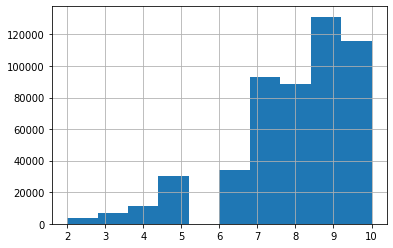

In [10]:
#actual distribution of the reviews using a histogram
hist = data['Reviewer_Score'].hist()

Observing the histogram plotted above, the actual distribution is far more negatviely skewed than expected. Surprisingly, a minimal amount of reviews fall in the range from 5 to 6. Majority of the hotels have reviews greater than or equal to 7. This indicates that the dataset contains a majority of popular hotels. 

In [11]:
#taking a look at the average of the reviews
print("Average of the reviews is", data['Reviewer_Score'].mean())

Average of the reviews is 8.012880571142713


A mean of 8.01 is significantly higher than the expected mean of 5.5. This further strengthens the claim that the dataset mainly consists of popular hotels.

Potential issue with the distribution for the classification problem

Since the data is negatively skewed, this will affect the performance of our classification model. The reason for this is that the tail region (left hand side in this case) may act as an outlier for the model. A very less number of reviews less than 5 may make these data points outliers in our dataset and outliers adversely affect the performance of the classification model. The skewed data will need to be transformed close to a normal distribution. A decreased model accuracy will be observed if skewed data is used

Numeric and Non-Numeric columns

In [12]:
#data types of all the columns in the dataframe
data.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [41]:
#numeric columns
numeric = data.select_dtypes(exclude = ['object']).columns.tolist()
for i in range(1,len(numeric)):
  print("Numeric column no.",i,"in the dataset:", numeric[i])

Numeric column no. 1 in the dataset: Average_Score
Numeric column no. 2 in the dataset: Review_Total_Negative_Word_Counts
Numeric column no. 3 in the dataset: Total_Number_of_Reviews
Numeric column no. 4 in the dataset: Review_Total_Positive_Word_Counts
Numeric column no. 5 in the dataset: Total_Number_of_Reviews_Reviewer_Has_Given
Numeric column no. 6 in the dataset: Reviewer_Score
Numeric column no. 7 in the dataset: lat
Numeric column no. 8 in the dataset: lng


In [42]:
#non-numeric columns
non_numeric = data.select_dtypes(include = ['object']).columns.tolist()
for i in range(1,len(non_numeric)):
  print("Non Numeric column no.",i,"in the dataset:", non_numeric[i])

Non Numeric column no. 1 in the dataset: Review_Date
Non Numeric column no. 2 in the dataset: Hotel_Name
Non Numeric column no. 3 in the dataset: Reviewer_Nationality
Non Numeric column no. 4 in the dataset: Negative_Review
Non Numeric column no. 5 in the dataset: Positive_Review
Non Numeric column no. 6 in the dataset: Tags
Non Numeric column no. 7 in the dataset: days_since_review


Among the non numeric columns mentioned above, the 'days_since_review', 'Review_Date' and 'Reviewer_Nationality' columns can be turned into numeric type

###Data Wrangling

Converting the Reviewer_Score column into Binary

In [43]:
#replacing reviews in the range 0-8 with 'not good' and 9,10 with 'good'
reviews = range(9)
for i in reviews:
    data['Reviewer_Score'] = data['Reviewer_Score'].replace(i,'not good')

data['Reviewer_Score'] = data['Reviewer_Score'].replace(9,'good')
data['Reviewer_Score'] = data['Reviewer_Score'].replace(10,'good')


In [44]:
#taking a look at the updated Reviewer_Score column
data['Reviewer_Score'].head()

0    not good
1    not good
2    not good
3    not good
4    not good
Name: Reviewer_Score, dtype: object

Converting Reviewer_Score to Binary

In [45]:
#converting good to 1 and not good to 0 in the reviewer_score column
reviews = {'good': 1,'not good': 0}

data.Reviewer_Score = [reviews[item] for item in data.Reviewer_Score]

Converting columns identified in previous parts to numeric

In [46]:
#converting days_since_review column to numeric type
data['days_since_review'].head()

0     0 days
1     0 days
2     3 days
3     3 days
4    10 days
Name: days_since_review, dtype: object

Currently, the values in 'days_since_review' column contains the 'days' and 'day' string. We will exclude this string from the column values and then convert the column type to numeric

In [47]:
#replacing 'days' string with empty string '' and converting column to numeric
data['days_since_review'] = data['days_since_review'].str.replace(r'days', '')
#in some rows, the column contains 'day' instead of 'days'
data['days_since_review'] = data['days_since_review'].str.replace(r'day', '')
#conversion
data['days_since_review'] = data['days_since_review'].astype(int)

In [48]:
print('The data type of days_since_review column has been converted to', data['days_since_review'].dtype)

The data type of days_since_review column has been converted to int64


Converting Reviewer Nationality column into numeric

In [49]:
data.Reviewer_Nationality=data.Reviewer_Nationality.astype('category').cat.codes

Converting Review Date to numeric

In [50]:
#converting review date to datetime in order to splut day, month and date
data['Review_Date']= pd.to_datetime(data['Review_Date'])


In [51]:
#creating separate columns for day, month and year
data['year'] = pd.DatetimeIndex(data['Review_Date']).year
data['month'] = pd.DatetimeIndex(data['Review_Date']).month
data['day'] = pd.DatetimeIndex(data['Review_Date']).day
data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,year,month,day
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,167,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,2017,8,3
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,98,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,52.360576,4.915968,2017,8,3
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,14,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3,52.360576,4.915968,2017,7,31
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,214,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,52.360576,4.915968,2017,7,31
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,146,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,52.360576,4.915968,2017,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-30,8.1,Atlantis Hotel Vienna,111,no trolly or staff to help you take the lugga...,14,2823,location,2,8,0,"[' Leisure trip ', ' Family with older childre...",704,48.203745,16.335677,2015,8,30
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-22,8.1,Atlantis Hotel Vienna,66,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,0,"[' Leisure trip ', ' Family with young childre...",712,48.203745,16.335677,2015,8,22
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-19,8.1,Atlantis Hotel Vienna,62,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,0,"[' Leisure trip ', ' Family with older childre...",715,48.203745,16.335677,2015,8,19
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,2015-08-17,8.1,Atlantis Hotel Vienna,133,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,0,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717,48.203745,16.335677,2015,8,17


Dropping all non-numeric columns except positive review and negative review

Now that we have converted days_since_review to numeric type, let's take a look at the current non-numeric columns in the dataset

In [52]:
non_numerics = data.select_dtypes(include = ['object']).columns.tolist()
non_numerics

['Hotel_Address', 'Hotel_Name', 'Negative_Review', 'Positive_Review', 'Tags']

In [53]:
#dropping the non numeric columns except Negative_Review and Positive_Review
data.drop(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Tags'], axis=1, inplace=True)

In [54]:
#the remaining columns in the dataset are
cols = data.columns
for i in cols:
  print(i)

Additional_Number_of_Scoring
Average_Score
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
days_since_review
lat
lng
year
month
day


Splitting the data in train and test sets

In [55]:
# Randomly sample 10% of the dataframe
df = data.sample(frac=0.1)

In [56]:
print("No. of rows in 10% of the dataframe are: ", df.shape[0])

No. of rows in 10% of the dataframe are:  51574


In [57]:
#checking for 'not good' and 'good' value counts in the 10% subset of the dataframe
df['Reviewer_Score'].value_counts()

0    26936
1    24638
Name: Reviewer_Score, dtype: int64

In [58]:
# store data in X and y
#X contains our features
#y contains binary target variable Reviewer_Score
X = df.loc[:, df.columns != 'Reviewer_Score']
y = df['Reviewer_Score']

In [59]:
#splitting the dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Vecotrizing Positive and Negative Reivews using Count Vecotrizer

In [83]:
#importing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#All english stopwords will be eliminated
#All words that occur less than 30% of the times will be eliminated, this helps clean the data and saves space by reducing the size of sparse matrix
bagofwords = CountVectorizer(stop_words="english", min_df=0.2)


Vectorizing Postivie_Reviews

In [84]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform Positive Review from Train Set
positive_review_train = bagofwords.transform(X_train['Positive_Review'])
positive_review_train

<34554x3 sparse matrix of type '<class 'numpy.int64'>'
	with 33328 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


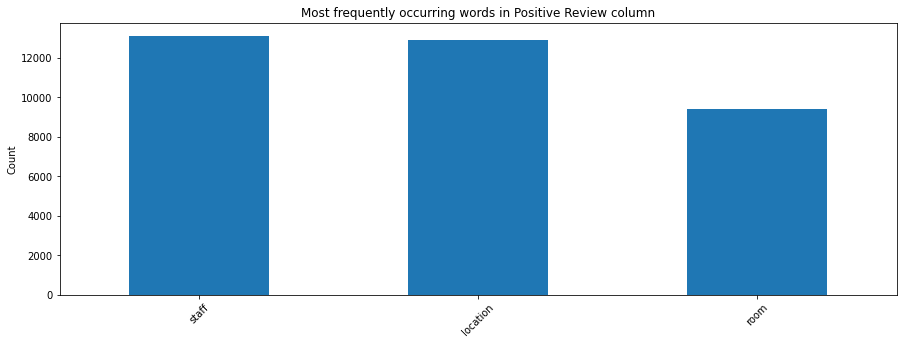

In [85]:
#taking a look at top n most frequent words in positive reviews columns
word_counts = pd.DataFrame(
    {"counts": positive_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Positive Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Vectorizing Negative_Reviews

In [86]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Negative_Review'])

# 3. Transform Positive Review from Train Set
negative_review_train = bagofwords.transform(X_train['Negative_Review'])
negative_review_train

<34554x2 sparse matrix of type '<class 'numpy.int64'>'
	with 16996 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


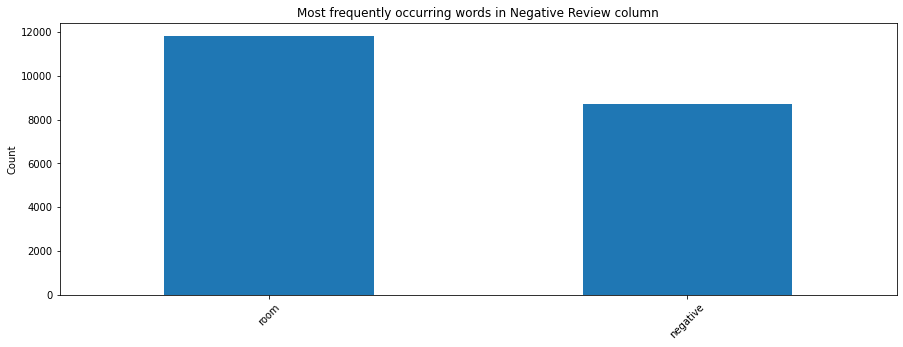

In [87]:
#taking a look at top n most frequent words in negative reviews columns
word_counts = pd.DataFrame(
    {"counts": negative_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Negative Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Setting min_df = 0.2 removes all terms that appear in less than 20% of the columns. We get very few terms as a result hence the min_df needs to be adjusted

In [89]:
#setting min_df = 0.1
bagofwords = CountVectorizer(stop_words="english", min_df=0.1)

In [90]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform Positive Review from Train Set
positive_review_train = bagofwords.transform(X_train['Positive_Review'])
positive_review_train

<34554x13 sparse matrix of type '<class 'numpy.int64'>'
	with 85566 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


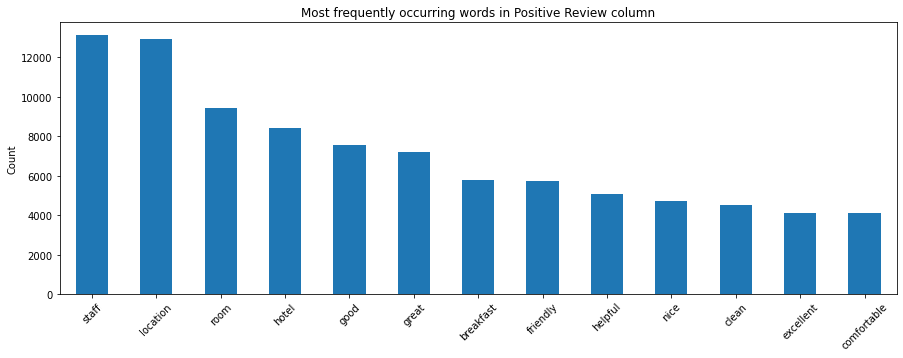

In [91]:
#taking a look at top n most frequent words in positive reviews columns
word_counts = pd.DataFrame(
    {"counts": positive_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Positive Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [92]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Negative_Review'])

# 3. Transform Positive Review from Train Set
negative_review_train = bagofwords.transform(X_train['Negative_Review'])
negative_review_train

<34554x3 sparse matrix of type '<class 'numpy.int64'>'
	with 20670 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


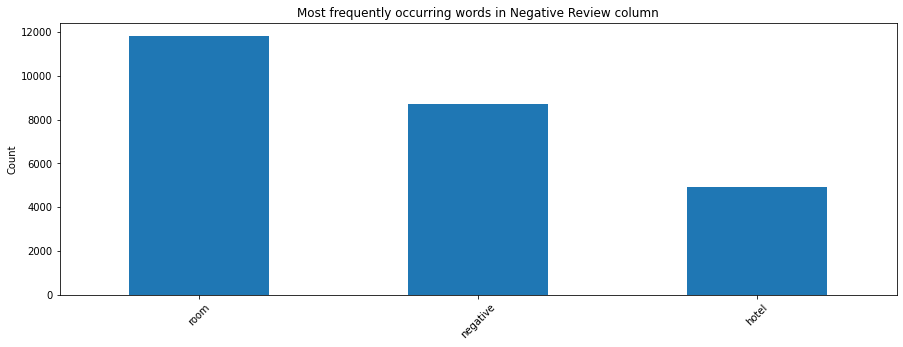

In [93]:
#taking a look at top n most frequent words in negative reviews columns
word_counts = pd.DataFrame(
    {"counts": negative_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Negative Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Setting min_df = 0.1 did give us relevant and good amount of terms for the positive reviews. However still for the negative reviews, we only get 3 terms. We will have to adjust min_df further

Setting min_df = 0.03

In [95]:
#setting min_df = 0.03
bagofwords = CountVectorizer(stop_words="english", min_df=0.03)

In [96]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform Positive Review from Train Set
positive_review_train = bagofwords.transform(X_train['Positive_Review'])
positive_review_train

<34554x35 sparse matrix of type '<class 'numpy.int64'>'
	with 121364 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


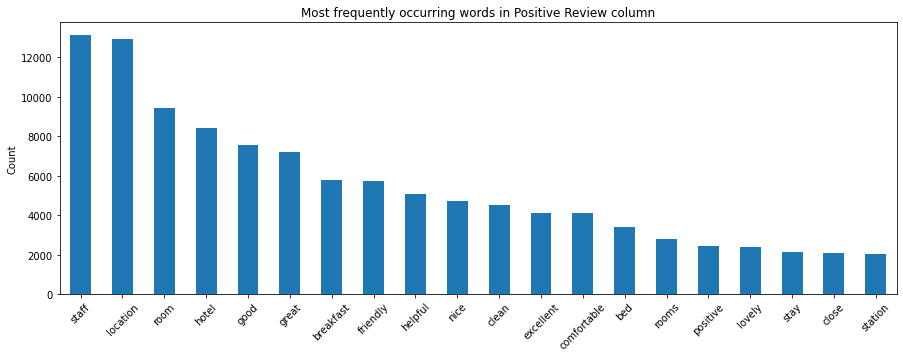

In [97]:
#taking a look at top n most frequent words in positive reviews columns
word_counts = pd.DataFrame(
    {"counts": positive_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Positive Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [98]:
# Fit count vectorizer on positive review
bagofwords.fit(X_train['Negative_Review'])

# 3. Transform Positive Review from Train Set
negative_review_train = bagofwords.transform(X_train['Negative_Review'])
negative_review_train

<34554x22 sparse matrix of type '<class 'numpy.int64'>'
	with 51821 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


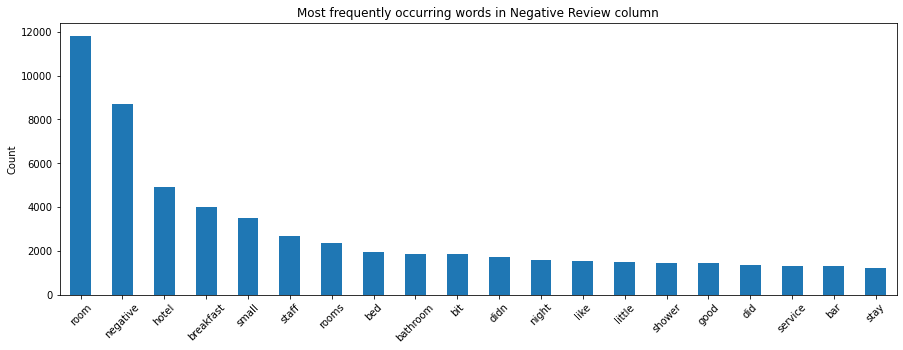

In [99]:
#taking a look at top n most frequent words in negative reviews columns
word_counts = pd.DataFrame(
    {"counts": negative_review_train.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Most frequently occurring words in Negative Review column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

As it can be seen, setting min_df = 0.03 gives a good amount of relevant terms for both positive and negative reviews

Transforming the test sets as well

In [100]:
positive_review_test = bagofwords.transform(X_test['Positive_Review'])
negative_review_test = bagofwords.transform(X_test['Negative_Review'])


In [101]:
#converting the sparse matrices to numpy arrays

#train
positive_review_train.toarray()
negative_review_train.toarray()

#test
positive_review_test.toarray()
negative_review_test.toarray()


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
#getting the numerical data into a separate matrix
numerical_data_train = X_train.drop(['Positive_Review', 'Negative_Review'], axis=1)
#convert into matrix
numerical_data_train = numerical_data_train.values

At this point we have obtained our three matrices:

Numerical Data

Vectorized Positive Reviews

Vectorized Negative Reviews



Combining the three matrices for training dataset

In [103]:
combined_matrices_train = np.concatenate((numerical_data_train, positive_review_train, negative_review_train), axis=None)
combined_matrices_train

array([542.0, 8.2, 216.0, ..., 14.0,
       <34554x35 sparse matrix of type '<class 'numpy.int64'>'
       	with 121364 stored elements in Compressed Sparse Row format>,
       <34554x22 sparse matrix of type '<class 'numpy.int64'>'
       	with 51821 stored elements in Compressed Sparse Row format>],
      dtype=object)

Doing the same for test data

In [104]:
#getting the numerical data into a separate matrix
numerical_data_test = X_test.drop(['Positive_Review', 'Negative_Review'], axis=1)
#convert into matrix
numerical_data_test = numerical_data_test.values

In [105]:
combined_matrices_test = np.concatenate((numerical_data_test, positive_review_test, negative_review_test), axis=None)
combined_matrices_test

array([1322.0, 8.4, 214.0, ..., 1.0,
       <17020x22 sparse matrix of type '<class 'numpy.int64'>'
       	with 28176 stored elements in Compressed Sparse Row format>,
       <17020x22 sparse matrix of type '<class 'numpy.int64'>'
       	with 25130 stored elements in Compressed Sparse Row format>],
      dtype=object)

The purpose of min_df is to remove terms or words that appear too infrequently. For example, if we set min_df = 0.2, it will remove all the terms that appear less than 20% of the times on our document/sentence/column